<img src="pictures/logoinpe.png" alt="Drawing" style="width: 600px;" class="center"/>

# ZAMS Data Processing 

On the above cells we will separate the data from the ZAMS output into files. These files will be prepared to be read using '''pandas''' library

I have force a output file in csv format for read again in pandas. But I have sure there is some way to do this without need these

In these case the output file was named has "teste3.dat". You MUST to put your file name

This code was written by Luan Orion Baraúna. It is part of the evaluation test of the Stellar Evolution II course offered by the National Institute for Space Research (INPE) given by Professor Carlos Alexandre.

The data analysis performed here uses the reading files extracted from the ZAMS.for program and which can be found at this link.

http://www.das.inpe.br/~alex/Ensino/cursos/evolucaoII/evestelar_II.html

# Question 01

I generated 12 models within this code for 3 types of chemical composition and 3 solar masses. The outputs were named as 'models_' The numbers 0, 1 and 2 that follow represent the different chemical compositions and the numbers 1, 2, 3 and 4 that follow represent the different solar masses



# Question 02

The 3 chemical compositions are [X=0.74, Y=0.24], [X=0.6, Y=0.39] e  [X=0.55, Y=0.4]. I generated for 1, 10 60 and 0.5 solar masses. I used the data that are in the reference book table


# Question 03 

Done

# Questão 04
a) Gere quatro modelos com composição solar e diferentes massas, sendo uma igual à massa do Sol. 

b) Depois, faça o mesmo

b.1) para quatro modelos com composição mais rica e 

b.2) quatro modelos com composição mais pobre que a composição solar, 

para comparar os efeitos da composição química. Isso ajudará você a determinar valores razoáveis para a metalicidade Z. A Tabela 1, no final da série, ajudará a organizar os modelos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model = ['01'  #M = 1;
        ,'02' # M = 10
        ,'03' # M = 60
        ,'04' # M = 0.5 
        ,'11'
        ,'12'
        ,'13'
        ,'14'
        ,'21' 
        ,'22'
        ,'23'
        ,'24'] 
labels = ['$1$ $M_\odot$','$10$ $M_\odot$','$60$ $M_\odot$','$0.5$ $M_\odot$',
          '$1$ $M_\odot$','$10$ $M_\odot$','$60$ $M_\odot$','$0.5$ $M_\odot$',
          '$1$ $M_\odot$','$10$ $M_\odot$','$60$ $M_\odot$','$0.5$ $M_\odot$']

cor = ['red','blue','orange','yellow',
       'red','blue','orange','yellow',
       'red','blue','orange','yellow']

markes = ['o','x','*']

file_name = []
output_file1 = []
output_file2 = []
data_frame1 = []
data_frame2 = []
#out_put_1
raio = []
raio_abs = []
mass = []
dens = []
dens_nom_norm = []
pres = []
temp = []
#out_put_2
eps    = []
OP     = []
Lc     = []
Lc_Lt  = []
DEL    = []
DELAD  = []
DELRAD = []

#that is not the smart way to do it 
for i in range(len(model)):
    file_name.append('model_'+model[i]+'.dat')
    output_file1.append('out1_'+model[i]+'.dat')
    output_file2.append('out2_'+model[i]+'.dat')
    data_frame1.append('df1_'+model[i])
    data_frame2.append('df2_'+model[i])
    raio.append('raio'+model[i])
    raio_abs.append('raio_abs'+model[i])
    mass.append('mass'+model[i])
    dens.append('dens'+model[i])
    pres.append('pres'+model[i])
    temp.append('temp'+model[i])
    
    eps.append('bla'+model[i])
    dens_nom_norm.append('bla'+model[i])
    OP.append('bla'+model[i])
    Lc.append('bla'+model[i])
    Lc_Lt.append('bla'+model[i])
    DEL.append('bla'+model[i])
    DELAD.append('bla'+model[i])
    DELRAD.append('bla'+model[i])

In [2]:
#first lets open, read and separate the lines the output data file from the ZAMS code
for k in range(len(model)):
    leitura = open(file_name[k]).read().splitlines()
    #We just want Astrophysical information, so we need to find from which line is that staring. 
    for i in range(len(leitura)):
        if leitura[i] == '           1-Mr/M       LOG(r)   LOG(P)  LOG(T) LOG(RHO) LOG(L)': 
            begin1 = i
        else: pass
    #Each file contains two data information
    for i in range(len(leitura)):
        if leitura[i] == ' ***************************************':
            begin2 = i
    #Now we will splite the data in thow separeted lists
    #obs1.: Its important to remind that the outpout from ZAMS has 'D' representing the exponencial. 
    #we must to replace it for 'E'
    #obs2.: On the second data list there is some data that is joined to the column. We need to change a space in '-'
    #obs3.: For transform in a csv file the data must to be separated by a ','
    #del(data1)
    data1 = []
    data2 = []
    for i in range(begin1, begin2):    
        data1.append(','.join(leitura[i].split()).replace('D','E'))#.split())
    for i in range(begin2+1, len(leitura)): data2.append(','.join(leitura[i].split()).replace('-',' -'))#.split())

    #Saving the data in a output file processed
    text1 = open(output_file1[k], "w")
    for i in data1: text1.write(i + "\n")
    text1.close()

    text2 = open(output_file2[k], "w")
    for i in data2: text2.write(i + "\n")
    text2.close()


\begin{equation}
    T_c \approx 1,6 . 10^7 \frac{M}{M_\odot} \frac{R_\odot}{R} 
\end{equation}

\begin{equation}
    P_c \approx 3,0 . 10^{17} \left( \frac{M}{M_\odot} \right)^2 \left( \frac{R_\odot}{R}  \right)^4
\end{equation}

\begin{equation}
    \frac{L}{L_\odot} \approx 8,970 . 10^{-16} \left( \frac{R}{R_\odot} \right)^2 T_{eff}^4
\end{equation}


In [3]:
# Creating functions to comperer the tabular data

import astropy as astro
from astropy import constants as const
R_sun = const.R_sun.cgs.value #definig the Sun radius
M_sun = const.M_sun.cgs.value 

def ex(x): 
    return 10**x
def Pc(M,R): #Central Pression 
    return 3e17*M**2*(R_sun/R)**4
def Lo(R,Te): #Luminosity for Solar Luminosity
    8.97e-16*(R/R_sun)**2*Te**4
def Tc(M,R): #Central Temperature 
    return 1.6e7*M*(R_sun/R)

## Using Pandas
We will use pandas for read the data

In [4]:

#Alocate all dataframs in the one single vector
for k in range (len(model)):
    data_frame1[k] = pd.read_csv(output_file1[k])
    data_frame2[k] = pd.read_csv(output_file2[k])
#Alocate the physical variabels
for k in range(len(model)):
    raio[k] =       10**(data_frame1[k]["LOG(r)"])      /max(10**data_frame1[k]["LOG(r)"])
    raio_abs[k] =       10**(data_frame1[k]["LOG(r)"]) 
    mass[k] =          1-data_frame1[k]["1-Mr/M"] 
    dens[k] =     10**(data_frame1[k]["LOG(RHO)"])/max(10**data_frame1[k]["LOG(RHO)"])
    dens_nom_norm[k] = 10**(data_frame1[k]["LOG(RHO)"])
    pres[k] =     10**(data_frame1[k]["LOG(P)"])  /max(10**data_frame1[k]["LOG(P)"])
    temp[k] =     10**(data_frame1[k]["LOG(T)"])  /max(10**data_frame1[k]["LOG(T)"])
    
    eps[k]  = (data_frame2[k]['LOG(EPS)'])
    OP[k]   = 10**(data_frame2[k]['LOG(OP)'])
    Lc[k]   = 10**(data_frame2[k]['LOG(Lc)']) 
    Lc_Lt[k]= (data_frame2[k]['Lc/Ltot'])
    DEL[k]  = (data_frame2[k]['DEL'])    
    DELAD[k]= (data_frame2[k]['DELAD'])  
    DELRAD[k]=(data_frame2[k]['DELRAD']) 

In [5]:
#Composição quimica dos modelos
Q1 = [0.74,0.24]
Q2 = [0.6 ,0.39]
Q3 = [0.55,0.4]
Q = [Q1,Q2,Q3]
def Z(X,Y):
    return (1-(X+Y))
print('Metallicity:\nZ1 =',round(Z(Q1[0],Q1[1]),3),'; Z2 =',round(Z(Q2[0],Q2[1]),3),'; Z3 =',round(Z(Q3[0],Q3[1]),3))

Metallicity:
Z1 = 0.02 ; Z2 = 0.01 ; Z3 = 0.05


# Questão 06

The models are maded by 3 chemical compositions. 

The model 0 are X = 0.71, Y = 0.24 and Z = 0.02
The model 1 are X = 0.6, Y = 0.39 and Z = 0.01
The model 2 are X = 0.55, Y = 0.4 and Z = 0.05

They are maded for 4 solor massas. $M_1 = M_\odot$, $M_2 = 10 M_\odot$, $M_3 = 60M_\odot$ and $M_4 = 0.5 M_\odot$. 

The data has allready stored on the dataframe. Now we gona made the Data Analayses.

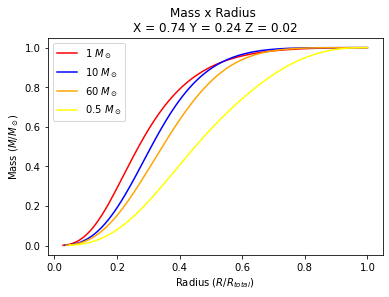

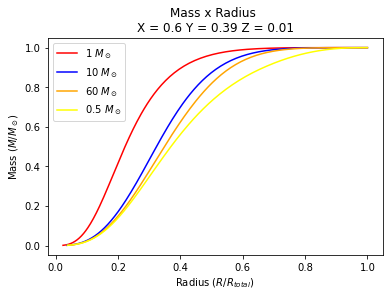

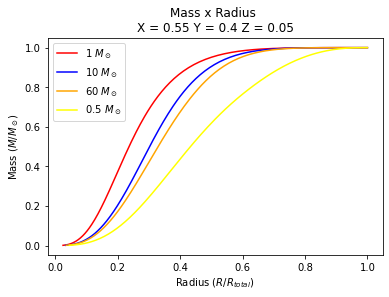

In [6]:
for k in range (0,3):
    chem = k 
    for i in range(0,4):
         plt.plot(raio[i+4*k],mass[i+k], label=labels[i], color = cor[i])
    plt.title('Mass x Radius \nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    plt.xlabel('Radius $(R/R_{total})$')
    plt.ylabel('Mass $(M/M_\odot)$')
    plt.legend()
    plt.savefig('chart/q6_MxR'+str(chem)+'.pdf')
    plt.show()

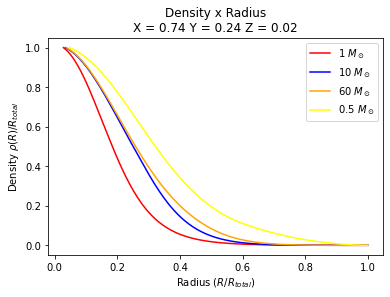

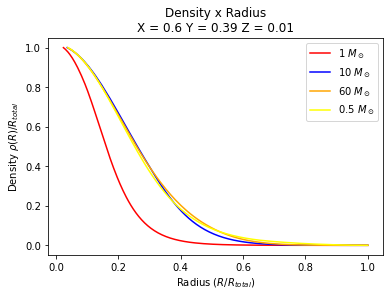

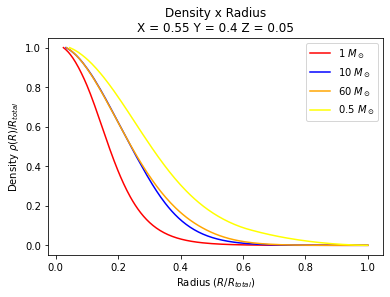

In [7]:
for k in range(0,3):
    chem = k 
    for i in range(0,4):
         plt.plot(raio[i+4*k],dens[i+4*k], label=labels[i], color = cor[i])
    plt.title('Density x Radius\nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    plt.xlabel('Radius $(R/R_{total})$')
    plt.ylabel('Density $ρ(R)/R_{total}$')
    plt.legend()
    plt.savefig('chart/q6_RhoxR'+str(chem)+'.pdf')
    plt.show()

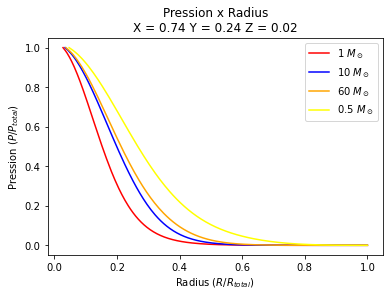

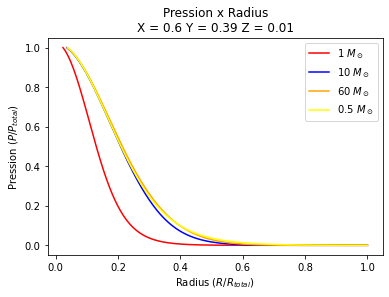

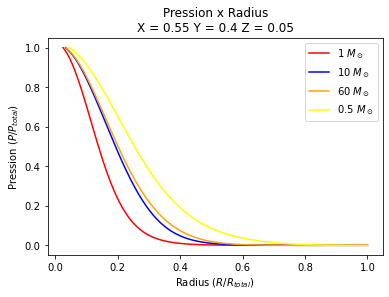

In [8]:
for k in range(0,3):
    chem = k 
    for i in range(0,4):
         plt.plot(raio[i+4*k],pres[i+4*k], label=labels[i], color = cor[i])
    plt.title('Pression x Radius\nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    plt.xlabel('Radius $(R/R_{total})$')
    plt.ylabel('Pression $(P/P_{total})$')
    plt.legend()
    plt.savefig('chart/q6_PxR'+str(chem)+'.pdf')
    plt.show()

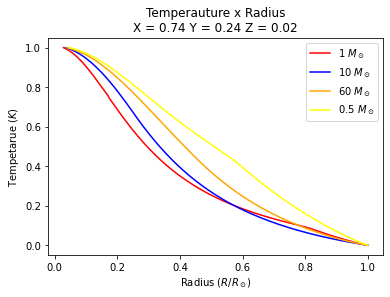

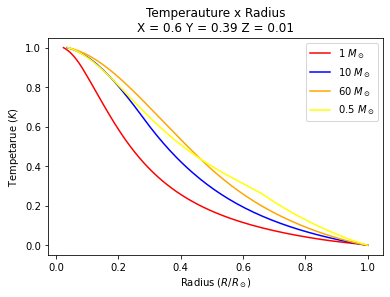

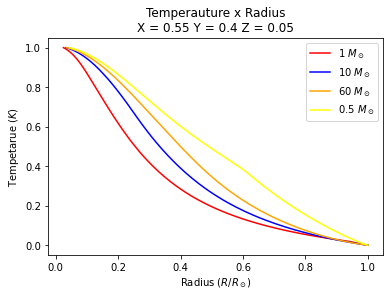

In [9]:
for k in range(0,3):
    chem = k 
    for i in range(0,4):
         plt.plot(raio[i+4*k],temp[i+4*k], label=labels[i], color = cor[i])
    plt.title('Temperauture x Radius\nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    plt.xlabel('Radius $(R/R_\odot)$')
    plt.ylabel('Tempetarue $(K)$')
    plt.legend()
    plt.savefig('chart/q6_TxR'+str(chem)+'.pdf')
    plt.show()


## Question 7

Now we plot the temperature gradient $\nabla$, $\nabla_\text{abd}$, $\nabla_\text{tem}$ gived by the second table.

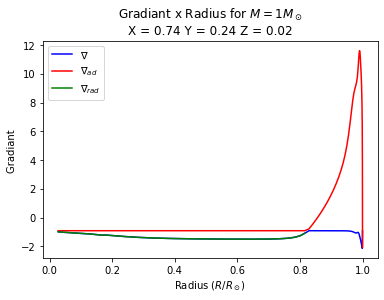

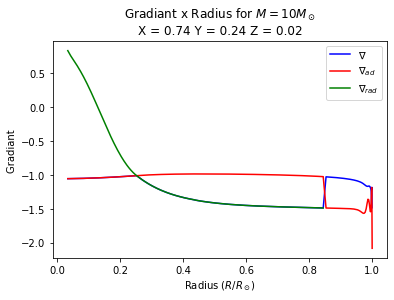

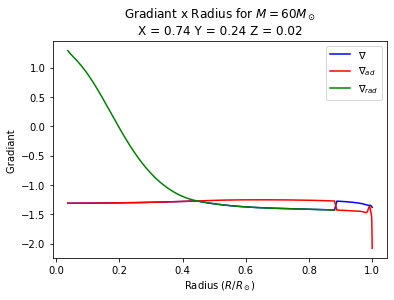

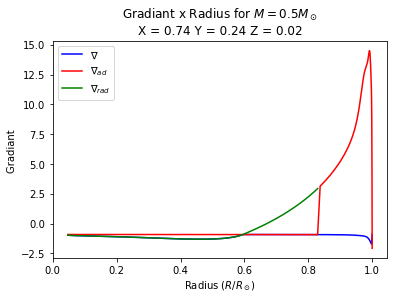

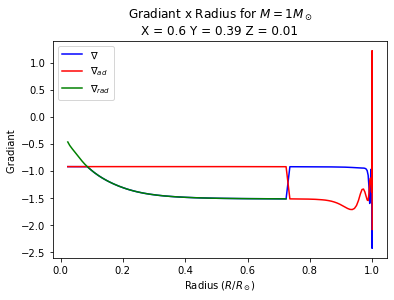

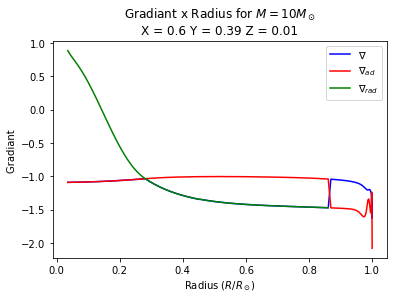

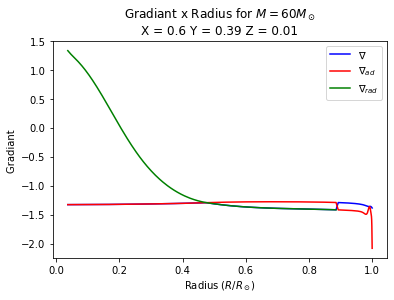

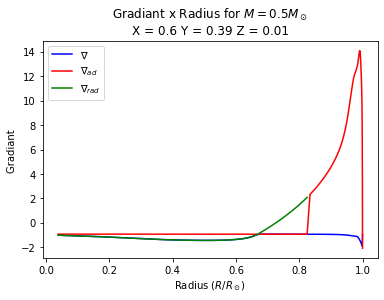

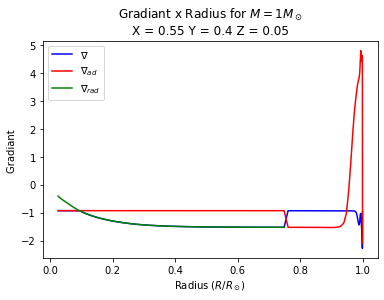

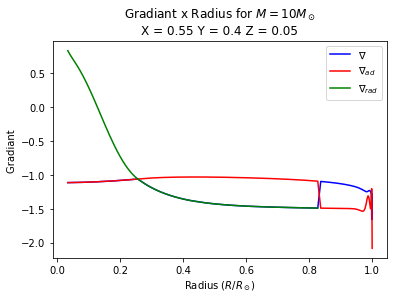

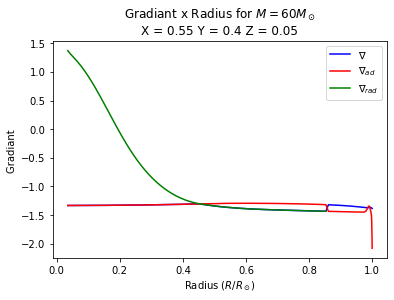

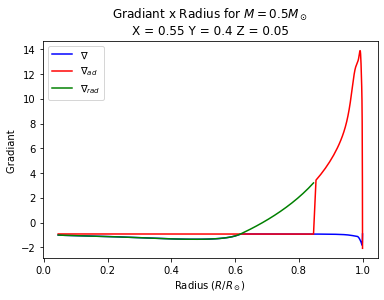

In [10]:
sol = ['1','10','60','0.5']
for k in range(0,3):
    for j in range(0,4): #loop para o 
        chem = k
        plt.plot(raio[j+4*k],np.log(DEL[j+4*k]),   label='$∇ $ ',    color = 'blue')
        plt.plot(raio[j+4*k],np.log(DELAD[j+4*k]), label='$∇_{ad}$', color = 'red')
        plt.plot(raio[j+4*k],np.log(DELRAD[j+4*k]),label='$∇_{rad}$',color = 'green')
        plt.title('Gradiant x Radius for $M = '+sol[j]+'M_\odot$\nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
        plt.xlabel('Radius $(R/R_\odot)$')
        plt.ylabel('Gradiant ')
        plt.legend()
        plt.savefig('chart/q7_gradxR_M'+str(sol[j])+'q_'+str(chem)+'.pdf')
        plt.show()

# Question 8

Olhando modelos com a mesma composição química, compare como as seguintes quantidades variam
em função da massa da estrela: 

a) temperatura central, 

b) densidade central, 

c) taxa de geração de energia

d) central e temperatura efetiva. 

Interprete esses resultados.



Study of how some variable change in function of the mass


In [11]:
# Here a extract the "Final Model" information on the ZAMS oringal output file.
# I creadt a dictionary for with model, that way, will be simple to plot

massas = [] 
pressa = []
temper = []
temeff = []
Lumini = []
radius = []


final_model = [{'Mass':1 ,'Pc': 1.4784E17, 'Tc': 1.4413E07, 'R': 6.9306E10, 'L': 3.4930E33, 'Teff':  5.6523E3, 'LOG(Teff)': 3.7522, 'LOG(L/LSUN)':-0.0419}, 
               {'Mass':10,'Pc': 3.7205E16, 'Tc': 3.0477E7,  'R': 2.5952E11, 'L': 2.2780E37, 'Teff':  2.6249E4, 'LOG(Teff)': 4.4191, 'LOG(L/LSUN)': 3.7724},
               {'Mass':60,'Pc': 1.6525E16, 'Tc': 3.9283E7,  'R': 7.0925E11, 'L': 1.9317E39, 'Teff':  4.8183E4, 'LOG(Teff)': 4.6829, 'LOG(L/LSUN)': 5.7008},
               {'Mass':.5,'Pc': 7.1343E16, 'Tc': 9.1634E6,  'R': 3.4880E10, 'L': 1.7802E32, 'Teff':  3.7856E3, 'LOG(Teff)': 3.5781, 'LOG(L/LSUN)':-1.3347}]


for i in range (len(final_model)): 
    massas.append(final_model[i]['Mass'])
    pressa.append(final_model[i]['Pc'])
    temper.append(final_model[i]['Tc'])
    temeff.append(final_model[i]['Teff'])
    Lumini.append(10**final_model[i]['LOG(L/LSUN)'])
    radius.append(final_model[i]['R'])

massas1 = [] 
pressa1 = []
temper1 = []
temeff1 = []
Lumini1 = []
radius1 = []
    
    
final_model1 = [{'Mass':  1,'Pc': 2.5884E17, 'Tc': 1.8949E7, 'R': 7.2200E10, 'L': 1.2644E34, 'Teff':  7.6386E3, 'LOG(Teff)': 3.8830, 'LOG(L/LSUN)': 0.5168},
                {'Mass': 10,'Pc': 3.8338E16, 'Tc': 3.3289E7, 'R': 2.4683E11, 'L': 3.9656E37, 'Teff':  3.0917E4, 'LOG(Teff)': 4.4902, 'LOG(L/LSUN)': 4.0132},
                {'Mass': 60,'Pc': 1.9622E16, 'Tc': 4.2183E7, 'R': 6.7391E11, 'L': 2.5234E39, 'Teff':  5.2845E4, 'LOG(Teff)': 4.7230, 'LOG(L/LSUN)': 5.8169},
                {'Mass':0.5,'Pc': 1.3217E17, 'Tc': 1.1504E7, 'R': 3.6773E10, 'L': 5.4397E32, 'Teff':  4.8746E3, 'LOG(Teff)': 3.6879, 'LOG(L/LSUN)':-0.8495}]


for i in range (len(final_model1)): 
    massas1.append(final_model1[i]['Mass'])
    pressa1.append(final_model1[i]['Pc'])
    temper1.append(final_model1[i]['Tc'])
    temeff1.append(final_model1[i]['Teff'])
    Lumini1.append(10**final_model1[i]['LOG(L/LSUN)'])
    radius1.append(final_model1[i]['R'])

    
massas2 = [] 
pressa2 = []
temper2 = []
temeff2 = []
Lumini2 = []
radius2 = []

final_model2 = [{'Mass':  1,'Pc': 1.5575E17, 'Tc': 1.7434E7, 'R': 7.7111E10, 'L': 5.8423E33, 'Teff':  6.0939E3, 'LOG(Teff)': 3.7849, 'LOG(L/LSUN)': 0.1815},
                {'Mass': 10,'Pc': 2.4681E16, 'Tc': 3.1006E7, 'R': 2.9526E11, 'L': 4.3447E37, 'Teff':  2.8920E4, 'LOG(Teff)': 4.4612, 'LOG(L/LSUN)': 4.0528},
                {'Mass': 60,'Pc': 1.3514E16, 'Tc': 3.9014E7, 'R': 7.8383E11, 'L': 2.8294E39, 'Teff':  5.0422E4, 'LOG(Teff)': 4.7026, 'LOG(L/LSUN)': 5.8666},
                {'Mass':0.5,'Pc': 8.6081E16, 'Tc': 1.0977E7, 'R': 3.4660E10, 'L': 2.7405E32, 'Teff':  4.2301E3, 'LOG(Teff)': 3.6264, 'LOG(L/LSUN)':-1.1473}]



for i in range (len(final_model2)): 
    massas2.append(final_model2[i]['Mass'])
    pressa2.append(final_model2[i]['Pc'])
    temper2.append(final_model2[i]['Tc'])
    temeff2.append(final_model2[i]['Teff'])
    Lumini2.append(10**final_model2[i]['LOG(L/LSUN)'])
    radius2.append(final_model2[i]['R'])


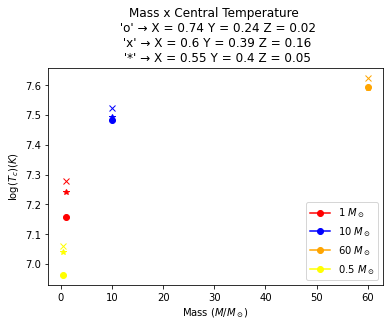

In [12]:
#Central temperature
chem = 0
for i in range(0,4):
    plt.plot(massas[i],np.log10(temper[i]), marker=markes[0], label=labels[i], color = cor[i])
    plt.plot(massas1[i],np.log10(temper1[i]), marker=markes[1],                  color = cor[i])
    plt.plot(massas2[i],np.log10(temper2[i]), marker=markes[2],                  color = cor[i])
plt.title('Mass x Central Temperature \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log( T_c ) (K)$')
plt.savefig('chart/q8_MxT.pdf')
plt.legend()
plt.show()


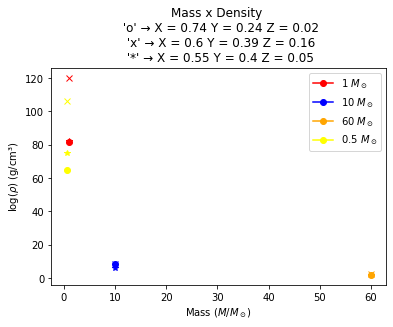

In [13]:
#Central Density
chem = 0 
for i in range(0,4):
    plt.plot(massas[i],dens_nom_norm[i].values[0], marker=markes[0], label=labels[i], color = cor[i])
    plt.plot(massas1[i],dens_nom_norm[i+4].values[0], marker=markes[1],               color = cor[i])
    plt.plot(massas2[i],dens_nom_norm[i+8].values[0], marker=markes[2],               color = cor[i])
plt.title('Mass x Density \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(\\rho)$ (g/cm³)' )
plt.legend()
plt.savefig('chart/q8_Mxrho.pdf')
plt.show()

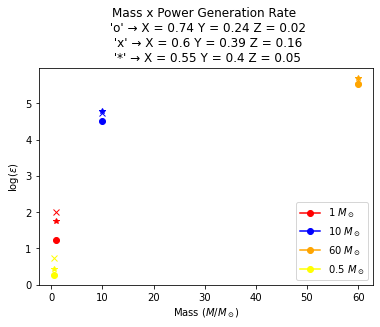

In [14]:
for i in range(0,4):
    plt.plot(massas[i], eps[i  ][0], marker=markes[0], label=labels[i], color = cor[i])
    plt.plot(massas1[i],eps[i+4][0], marker=markes[1],                  color = cor[i])
    plt.plot(massas1[i],eps[i+8][0], marker=markes[2],                  color = cor[i])
plt.title('Mass x Power Generation Rate \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(\\epsilon)$')
plt.legend()
plt.savefig('chart/q8_Mxpower.pdf')
plt.show()

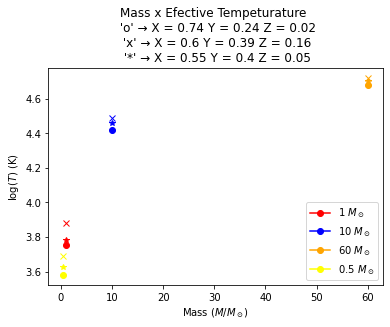

In [15]:
for i in range(0,4):
    plt.plot(massas[i],np.log10((temeff[i])),   marker=markes[0],label=labels[i],color = cor[i])
    plt.plot(massas1[i],np.log10((temeff1[i])), marker=markes[1],                color = cor[i])
    plt.plot(massas2[i],np.log10((temeff2[i])), marker=markes[2],                color = cor[i])
plt.title('Mass x Efective Tempeturature \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(T)$ (K)')
plt.legend()
plt.savefig('chart/q8_MxTeff.pdf')
plt.show()

# Question 9

###### 

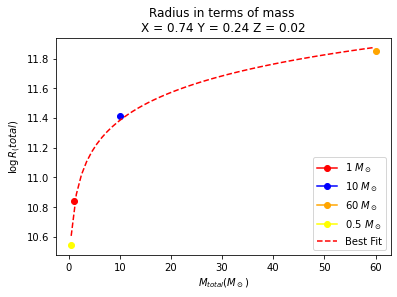

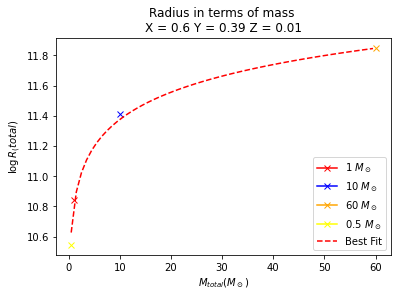

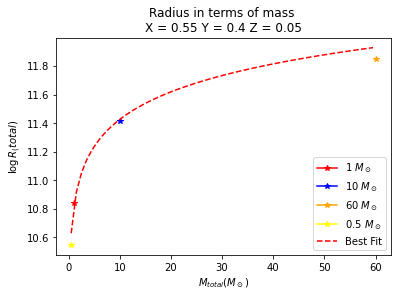


For chemical composition 1 

 \begin{equation}
    \log(R) = 10.781\cdot M^{0.024}
\end{equation} 

For chemical composition 2 

 \begin{equation}
    \log(R) = 10.796\cdot M^{0.023}
\end{equation} 

For chemical composition 2

 \begin{equation}
    \log(R) = 10.807\cdot M^{0.024}
\end{equation}


In [16]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
loop_mass = [massas,massas1,massas2]
loop_radi = [radius,radius1,radius2]
# define the true objective function
lista = []
list.clear
for k in range(len(loop_mass)):
    chem = k
    def objective(x, a, b):
        return a*x**b 
    # choose the input and output variables
    x, y = loop_mass[k], np.log10(loop_radi[k])
    # curve fit
    popt, _ = curve_fit(objective, x, y)
    # summarize the parameter values
    a, b = popt
    # plot input vs output
    #pyplot.scatter(x, y,color = cor[0:4],label = ['1 $M\odot$','10 $M\odot$','60 $M\odot$','0.5 $M\odot$'])

    for i in range(0,4): plt.plot(final_model[i]['Mass'], np.log10(final_model[i]['R']), color=cor[i], marker=markes[k],label=labels[i])

    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(min(x), max(x), 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    pyplot.plot(x_line, y_line, '--', color='red',label = 'Best Fit')

    pyplot.title('Radius in terms of mass \nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    pyplot.xlabel("$M_{total} (M_\odot)$")
    pyplot.ylabel("$\log R_({total})$")
    plt.legend()
    plt.savefig('chart/q9_RxM_q'+str(chem)+'.pdf')
    pyplot.show()
    #https://machinelearningmastery.com/curve-fitting-with-python/
    lista.append('\\begin{equation}\n    \\log(R) = '+str(round(a,3))+'\\cdot M^{'+str(round(b,3))+'}\n\end{equation}')
    

print('\nFor chemical composition 1 \n\n',lista[0],'\n\nFor chemical composition 2 \n\n',lista[1],'\n\nFor chemical composition 2\n\n',lista[2])

\begin{equation}
    \log(R) = 10.781\cdot M^{0.024}
\end{equation} 

For chemical composition 2 

 \begin{equation}
    \log(R) = 10.796\cdot M^{0.023}
\end{equation} 

For chemical composition 2

 \begin{equation}
    \log(R) = 10.807\cdot M^{0.024}
\end{equation}

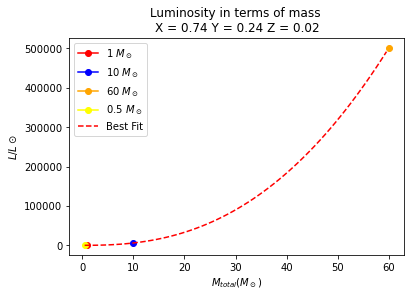

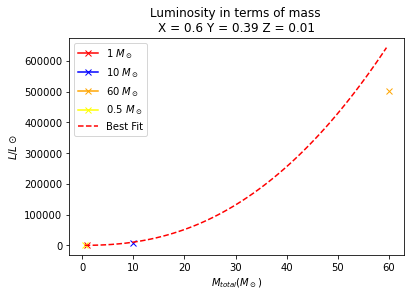

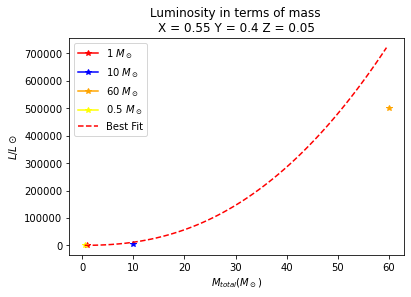


For chemical composition 1 

 \begin{equation}
    \frac{L}{L_\odot} = 19.688\cdot M^{2.478}
\end{equation} 

For chemical composition 2 

 \begin{equation}
    \frac{L}{L_\odot} = 49.57\cdot M^{2.318}
\end{equation} 

For chemical composition 2

 \begin{equation}
    \frac{L}{L_\odot} = 52.704\cdot M^{2.331}
\end{equation}


In [17]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

loop_mass = [massas,massas1,massas2]
loop_lumi = [Lumini,Lumini1,Lumini2]

lista = []
list.clear

for k in range(len(loop_mass)):
    chem = k
    # define the true objective function
    def objective(x, a, b):
        return a*x**b
    # choose the input and output variables
    x, y = loop_mass[k], loop_lumi[k]
    # curve fit
    popt, _ = curve_fit(objective, x, y)
    # summarize the parameter values
    a, b = popt
    # plot input vs output
    #pyplot.scatter(x, y,color = cor[0:4],label = ['1 $M\odot$','10 $M\odot$','60 $M\odot$','0.5 $M\odot$'])

    for i in range(0,4): plt.plot(final_model[i]['Mass'], Lumini[i], color=cor[i], marker=markes[k],label=labels[i])

    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(min(x), max(x), 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    pyplot.plot(x_line, y_line, '--', color='red',label = 'Best Fit')

    pyplot.title('Luminosity in terms of mass \nX = '+str(Q[chem][0])+' Y = '+str(Q[chem][1])+' Z = '+str(round(Z(Q[chem][0],Q[chem][1]),3)))
    pyplot.xlabel("$M_{total} (M_\odot)$")
    pyplot.ylabel("$L/L\odot$")
    plt.legend()
    plt.savefig('chart/q9_LxM_q'+str(chem)+'.pdf')
    pyplot.show()
    #print('\\begin{equation}\n    \\frac{L}{L_\odot} = ',round(a,3),  '\\cdot M^{', round(b,3), '}\n\end{equation}')
    #https://machinelearningmastery.com/curve-fitting-with-python/
    lista.append('\\begin{equation}\n    \\frac{L}{L_\odot} = '+str(round(a,3))+'\\cdot M^{'+str(round(b,3))+'}\n\end{equation}')
    

print('\nFor chemical composition 1 \n\n',lista[0],'\n\nFor chemical composition 2 \n\n',lista[1],'\n\nFor chemical composition 2\n\n',lista[2])

For chemical composition 1 

 \begin{equation}
    \frac{L}{L_\odot} = 19.688\cdot M^{2.478}
\end{equation} 

For chemical composition 2 

 \begin{equation}
    \frac{L}{L_\odot} = 49.57\cdot M^{2.318}
\end{equation} 

For chemical composition 2

 \begin{equation}
    \frac{L}{L_\odot} = 52.704\cdot M^{2.331}
\end{equation}

# BONUS


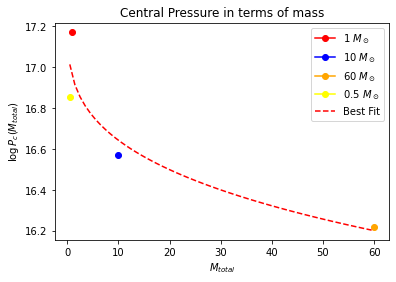

\begin{equation}
    \log(R) =  -0.317 M^{ 0.297 }
\end{equation}


In [18]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b,c):
	return a*x**b +c
# choose the input and output variables
x, y = massas, np.log10(pressa)
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
# plot input vs output
#pyplot.scatter(x, y,color = cor[0:4],label = ['1 $M\odot$','10 $M\odot$','60 $M\odot$','0.5 $M\odot$'])

for i in range(0,4): plt.plot(final_model[i]['Mass'], np.log10(final_model[i]['Pc']), color=cor[i], marker='o',label=labels[i])

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red',label = 'Best Fit')

pyplot.title("Central Pressure in terms of mass")
pyplot.xlabel("$M_{total}$")
pyplot.ylabel("$\log P_c(M_{total})$")
plt.legend()
pyplot.show()
#print('Function suposition is a*x**b+c\n', 'a =',format(a,'10.3e'),';b =',format(b,'10.3e'),';c =',format(c,'10.3e'))
print('\\begin{equation}\n    \log(R) = ',round(a,3),  'M^{', round(b,3), '}\n\end{equation}')
#https://machinelearningmastery.com/curve-fitting-with-python/

For these we can write that 

\begin{equation}
    \log(R) =  -0.317 M^{ 0.297 }
\end{equation}

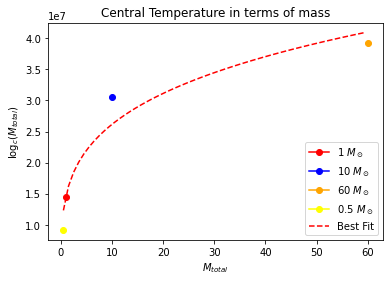

Function suposition is a*log(x)+b
 a =  1.467e+07 ;b =  2.509e-01


In [19]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a*x**b 
# choose the input and output variables
x, y = massas, temper
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b= popt
# plot input vs output
#pyplot.scatter(x, y,color = cor[0:4],label = ['1 $M\odot$','10 $M\odot$','60 $M\odot$','0.5 $M\odot$'])

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b )
# create a line plot for the mapping function

for i in range(0,4): plt.plot(final_model[i]['Mass'], (final_model[i]['Tc']), color=cor[i], marker='o',label=labels[i])

pyplot.plot(x_line, y_line, '--', color='red',label = 'Best Fit')

pyplot.title("Central Temperature in terms of mass")
pyplot.xlabel("$M_{total}$")
pyplot.ylabel("$\log_c(M_{total})$")
plt.legend()
pyplot.show()
print('Function suposition is a*log(x)+b\n', 'a =',format(a,'10.3e'),';b =',format(b,'10.3e'))
# https://machinelearningmastery.com/curve-fitting-with-python/

\begin{equation}
    T_c = 1.467 \cdot 10^7 \cdot M^{0.2509}
\end{equation}

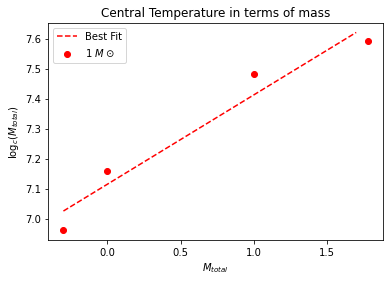

Function suposition is a*log(x)+b
 a =  2.978e-01 ;b =  7.115e+00


In [20]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a*x + b
# choose the input and output variables
x, y = np.log10(massas), np.log10(temper)
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
# plot input vs output
#pyplot.scatter(x, y,color = cor[0:4],label = ['1 $M\odot$','10 $M\odot$','60 $M\odot$','0.5 $M\odot$'])

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function


plt.scatter(np.log10(massas), np.log10(temper), color=cor[0], marker='o',label='1 $M\odot$')
#plt.plot(np.log10(M2['Mass']), np.log10(M2['Tc']), color=cor[1], marker='o',label='10 $M\odot$')
#plt.plot(np.log10(M3['Mass']), np.log10(M3['Tc']), color=cor[2], marker='o',label='60 $M\odot$')
#plt.plot(np.log10(M4['Mass']), np.log10(M4['Tc']), color=cor[3], marker='o',label='0.5 $M\odot$')

pyplot.plot(x_line, y_line, '--', color='red',label = 'Best Fit')

pyplot.title("Central Temperature in terms of mass")
pyplot.xlabel("$M_{total}$")
pyplot.ylabel("$\log_c(M_{total})$")
plt.legend()
pyplot.show()
print('Function suposition is a*log(x)+b\n', 'a =',format(a,'10.3e'),';b =',format(b,'10.3e'))
# https://machinelearningmastery.com/curve-fitting-with-python/

For these we can write that 

\begin{equation}
    \log(T_c) = 0.278 log(M) + 7.115
\end{equation}


\begin{equation}
    e^{\log(T_c)} = e^{0.278 log(M)+7.115}
\end{equation}


\begin{equation}
    T_c = e^{0.278 log(M)} \cdot e^{7.115}
\end{equation}


\begin{equation}
    T_c = M^{0.278} \cdot e^{7.115}
\end{equation}

\begin{equation}
    T_c = 1230.28 \cdot M^{0.278}
\end{equation}

# Question 10 

Estude os efeitos da composição química comparando os modelos com diferentes composições. Para
uma dada massa, 

a)quem possui a maior temperatura central?

b) A maior densidade central? 

c) A maior taxa de geração de energia. 

Explique o porquê dessa diferença.

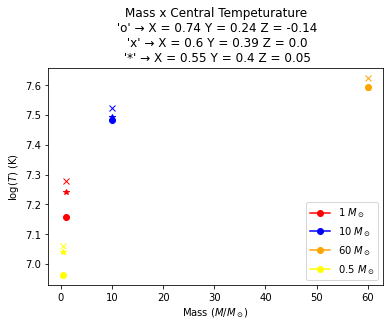

In [21]:
for i in range(0,4):
    plt.plot(massas[i],np.log10((temper[i])),   marker= markes[0], label=labels[i], color = cor[i])
    plt.plot(massas1[i],np.log10((temper1[i])), marker= markes[1],                  color = cor[i])
    plt.plot(massas2[i],np.log10((temper2[i])), marker= markes[2],                  color = cor[i])
plt.title('Mass x Central Tempeturature\n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(T)$ (K)')
plt.legend()
plt.savefig('chart/q10_MxTc.pdf')
plt.show()

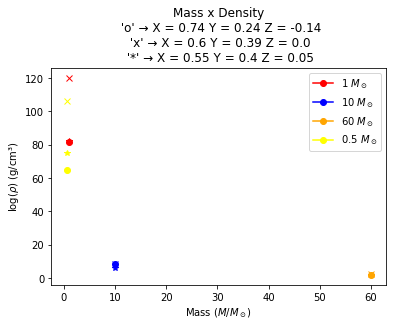

In [22]:
#Central Density
for i in range(0,4):
    plt.plot(massas[i],dens_nom_norm[i].values[0],    marker= markes[0], label = labels[i], color = cor[i])
    plt.plot(massas1[i],dens_nom_norm[i+4].values[0], marker= markes[1],                    color = cor[i])
    plt.plot(massas1[i],dens_nom_norm[i+8].values[0], marker= markes[2],                    color = cor[i])

plt.title('Mass x Density\n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(\\rho)$ (g/cm³)' )
plt.legend()
plt.savefig('chart/q10_MxRho.pdf')
plt.show()

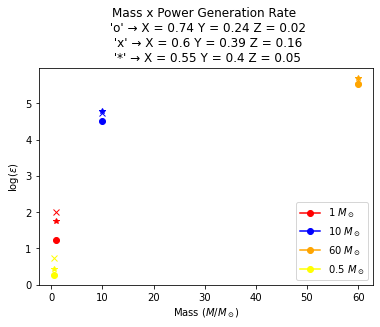

In [23]:
chem = 0
for i in range(0,4):
    plt.plot(massas[i],eps[i][0],   marker=markes[0], label = labels[i], color = cor[i])
    plt.plot(massas[i],eps[i+4][0], marker=markes[1],                    color = cor[i])
    plt.plot(massas[i],eps[i+8][0], marker=markes[2],                    color = cor[i])
plt.title('Mass x Power Generation Rate \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('Mass $(M/M_\odot)$')
plt.ylabel('$\log(\\epsilon)$')
plt.legend()
plt.savefig('chart/q10_MxPower.pdf')
plt.show()

# Question 11
Use seus dados para fazer um gráfico da Sequência Principal de Idade Zero (do inglês “Zero Age Main
Sequence” – ZAMS) no diagrama HR (log(Lsolar x T efetiva)). 

Como a SPIZ difere para estrelas de diferentes composições químicas? Como você explica as diferenças em temperatura efetiva e luminosidade entre dois modelos de mesma massa e diferente composição?


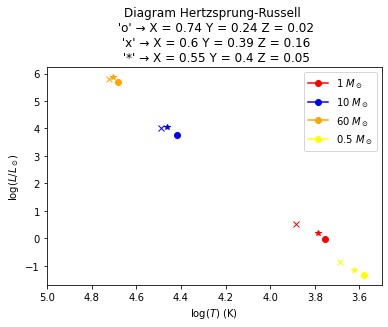

In [24]:
for i in range(0,4):
    plt.plot( np.log10((temeff[i])),np.log10(Lumini [i]), marker= markes[0], label= labels[i],color = cor[i])
    plt.plot(np.log10((temeff1[i])),np.log10(Lumini1[i]), marker= markes[1],                  color = cor[i])
    plt.plot(np.log10((temeff2[i])),np.log10(Lumini2[i]), marker= markes[2],                  color = cor[i])
plt.title('Diagram Hertzsprung-Russell \n \''+str(markes[0])+'\' → X = '+str(Q[0][0])+' Y = '+str(Q[0][1])+' Z = '+str(round(Z(Q[0][0],Q[chem][1]),3))+'\n \''+str(markes[1])+'\' → X = '+str(Q[1][0])+' Y = '+str(Q[1][1])+' Z = '+str(round(Z(Q[1][0],Q[chem][1]),3))+'\n \''+str(markes[2])+'\' → X = '+str(Q[2][0])+' Y = '+str(Q[2][1])+' Z = '+str(round(Z(Q[2][0],Q[2][1]),3)))
plt.xlabel('$\log(T)$ (K)')
plt.ylabel('$\log(L/L_\odot)$')
plt.xlim(5,3.5)
plt.legend()
plt.savefig('chart/q11_diagraRH.pdf')
plt.show()